In [6]:
%load_ext lab_black
import pandas as pd

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


In [27]:
data = pd.read_csv("Binance_BTC_1m.csv")
data

,TimeStamp,Open,High,Low,Close,Volume
0,2020-11-19 01:23:00,17844.72,17878.78,17843.08,17864.41,128.141795
1,2020-11-19 01:24:00,17863.82,17864.32,17844.14,17844.73,66.757429
2,2020-11-19 01:25:00,17844.73,17849.41,17826.35,17828.35,53.699989
3,2020-11-19 01:26:00,17828.36,17829.99,17801.54,17803.66,112.517483
4,2020-11-19 01:27:00,17803.66,17806.29,17783.68,17799.98,45.482920
...,...,...,...,...,...,...
199476,2021-04-06 22:38:00,57798.97,57831.81,57716.14,57758.10,94.209696
199477,2021-04-06 22:39:00,57758.09,57825.10,57745.28,57818.77,63.622250
199478,2021-04-06 22:40:00,57818.77,57860.83,57760.66,57783.63,96.278530
199479,2021-04-06 22:41:00,57783.62,57828.57,57760.00,57808.29,60.350468


In [28]:
data["delta"] = data["Close"].diff()
data

,TimeStamp,Open,High,Low,Close,Volume,delta
0,2020-11-19 01:23:00,17844.72,17878.78,17843.08,17864.41,128.141795,NaN
1,2020-11-19 01:24:00,17863.82,17864.32,17844.14,17844.73,66.757429,-19.68
2,2020-11-19 01:25:00,17844.73,17849.41,17826.35,17828.35,53.699989,-16.38
3,2020-11-19 01:26:00,17828.36,17829.99,17801.54,17803.66,112.517483,-24.69
4,2020-11-19 01:27:00,17803.66,17806.29,17783.68,17799.98,45.482920,-3.68
...,...,...,...,...,...,...,...
199476,2021-04-06 22:38:00,57798.97,57831.81,57716.14,57758.10,94.209696,-40.86
199477,2021-04-06 22:39:00,57758.09,57825.10,57745.28,57818.77,63.622250,60.67
199478,2021-04-06 22:40:00,57818.77,57860.83,57760.66,57783.63,96.278530,-35.14
199479,2021-04-06 22:41:00,57783.62,57828.57,57760.00,57808.29,60.350468,24.66


In [29]:
%time
price = data
df = price
for index, row in df.iterrows():
    temp = df.loc[index - 14 : index, "delta"]
    avg_up = temp[temp > 0].mean()
    avg_down = temp[temp < 0].mean()
    df.loc[index, "dUp"] = abs(avg_up)
    df.loc[index, "dDown"] = abs(avg_down)
    if avg_up and avg_down:
        rs = abs(avg_up / avg_down)
    if rs:
        rsi = 100 - 100 / (1 + rs)
    df.loc[index, "RS"] = rs
    df.loc[index, "RSI"] = rsi
df

Wall time: 0 ns


,TimeStamp,Open,High,Low,Close,Volume,delta,dUp,dDown,RS,RSI
0,2020-11-19 01:23:00,17844.72,17878.78,17843.08,17864.41,128.141795,NaN,NaN,NaN,NaN,NaN
1,2020-11-19 01:24:00,17863.82,17864.32,17844.14,17844.73,66.757429,-19.68,NaN,19.6800,NaN,NaN
2,2020-11-19 01:25:00,17844.73,17849.41,17826.35,17828.35,53.699989,-16.38,NaN,18.0300,NaN,NaN
3,2020-11-19 01:26:00,17828.36,17829.99,17801.54,17803.66,112.517483,-24.69,NaN,20.2500,NaN,NaN
4,2020-11-19 01:27:00,17803.66,17806.29,17783.68,17799.98,45.482920,-3.68,NaN,16.1075,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
199476,2021-04-06 22:38:00,57798.97,57831.81,57716.14,57758.10,94.209696,-40.86,59.901818,88.4425,0.677297,40.380258
199477,2021-04-06 22:39:00,57758.09,57825.10,57745.28,57818.77,63.622250,60.67,49.353636,88.4425,0.558031,35.816415
199478,2021-04-06 22:40:00,57818.77,57860.83,57760.66,57783.63,96.278530,-35.14,51.435000,77.7820,0.661271,39.805134
199479,2021-04-06 22:41:00,57783.62,57828.57,57760.00,57808.29,60.350468,24.66,52.929000,77.7820,0.680479,40.493149


In [33]:
# df.to_csv("RSI_data.csv")
df = pd.read_csv("RSI_data.csv")
df["RSI"] = df["RSI"].abs()
df = df.set_index("TimeStamp")
# df["RSI"].argmax()
# df.iloc[197299]
# df = df.drop(df.index[197299])
df

,Unnamed: 0,Open,High,Low,Close,Volume,delta,dUp,dDown,RS,RSI
TimeStamp,,,,,,,,,,,
2020-11-19 01:23:00,0,17844.72,17878.78,17843.08,17864.41,128.141795,NaN,NaN,NaN,NaN,NaN
2020-11-19 01:24:00,1,17863.82,17864.32,17844.14,17844.73,66.757429,-19.68,NaN,19.6800,NaN,NaN
2020-11-19 01:25:00,2,17844.73,17849.41,17826.35,17828.35,53.699989,-16.38,NaN,18.0300,NaN,NaN
2020-11-19 01:26:00,3,17828.36,17829.99,17801.54,17803.66,112.517483,-24.69,NaN,20.2500,NaN,NaN
2020-11-19 01:27:00,4,17803.66,17806.29,17783.68,17799.98,45.482920,-3.68,NaN,16.1075,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2021-04-06 22:38:00,199476,57798.97,57831.81,57716.14,57758.10,94.209696,-40.86,59.901818,88.4425,0.677297,40.380258
2021-04-06 22:39:00,199477,57758.09,57825.10,57745.28,57818.77,63.622250,60.67,49.353636,88.4425,0.558031,35.816415
2021-04-06 22:40:00,199478,57818.77,57860.83,57760.66,57783.63,96.278530,-35.14,51.435000,77.7820,0.661271,39.805134


<AxesSubplot:label='f1351539-04a8-4dcc-9abb-42a8b0b07400'>

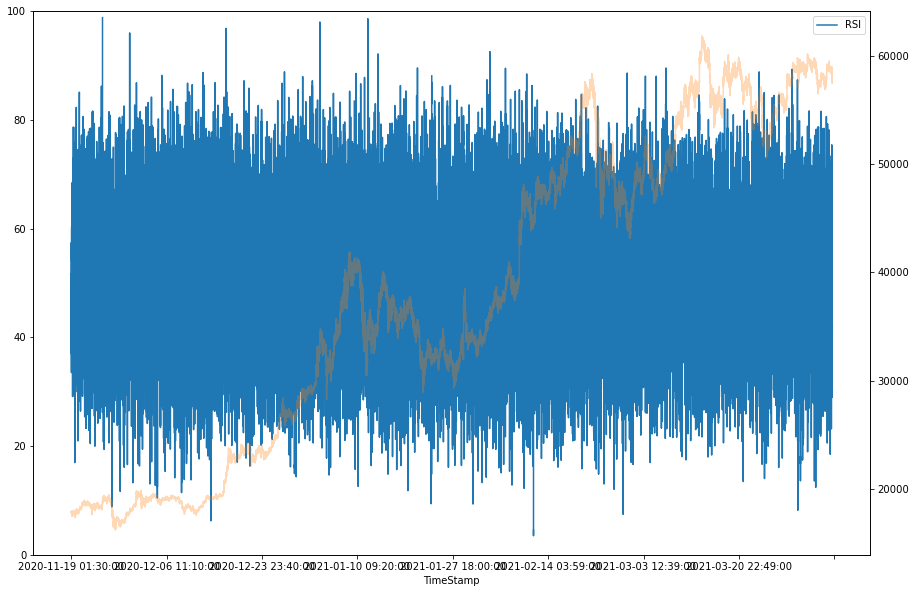

In [34]:
import matplotlib.pyplot as plt

%matplotlib inline
data = df
fig, ax = plt.subplots(figsize=(15, 10))
plt.ylim(0, 100)
start_time = "2020-11-19 01:30:00"
# start_time="1970-01-01 00:26:49.860"
data[["RSI"]].loc[start_time:].plot(ax=ax)
data["Close"].loc[start_time:].plot(ax=ax, secondary_y=True, alpha=0.3)

In [35]:
import datetime

i = 0
profit = 0
records = []
n = 0
for index, row in df.iterrows():
    day = datetime.datetime.strptime(index, "%Y-%m-%d %H:%M:%S")
    if i % 2 == 0:
        if row["RSI"] < 50 and n == 0:
            profit -= row["Close"]
            print(
                f"Buying 1 BTC @ USD {round(row['Close'])}, total profit: {round(profit)} on {day}"
            )
            records.append(["Buying", -round(row["Close"]), round(profit), day])
            n += 1
    else:
        if row["RSI"] > 60 and n > 0 and profit + row["Close"] > 0:
            profit += row["Close"]
            print(
                f"Selling 1 BTC @ USD {round(row['Close'])}, total profit: {round(profit)} on {day}"
            )
            records.append(["Selling", round(row["Close"]), round(profit), day])
            n -= 1
    i += 1
print(f"\nTotal profit: {round(profit)}")
# df.loc[start_time:]
# records

Buying 1 BTC @ USD 17800, total profit: -17800 on 2020-11-19 01:31:00
Selling 1 BTC @ USD 17816, total profit: 16 on 2020-11-19 07:46:00
Buying 1 BTC @ USD 17686, total profit: -17670 on 2020-11-19 08:25:00
Selling 1 BTC @ USD 17762, total profit: 91 on 2020-11-19 08:58:00
Buying 1 BTC @ USD 17703, total profit: -17612 on 2020-11-19 09:07:00
Selling 1 BTC @ USD 17731, total profit: 120 on 2020-11-19 09:22:00
Buying 1 BTC @ USD 17766, total profit: -17646 on 2020-11-19 09:37:00
Selling 1 BTC @ USD 17792, total profit: 146 on 2020-11-19 09:42:00
Buying 1 BTC @ USD 17769, total profit: -17623 on 2020-11-19 09:47:00
Selling 1 BTC @ USD 17908, total profit: 284 on 2020-11-19 10:00:00
Buying 1 BTC @ USD 17985, total profit: -17700 on 2020-11-19 10:31:00
Selling 1 BTC @ USD 17981, total profit: 280 on 2020-11-19 11:08:00
Buying 1 BTC @ USD 17902, total profit: -17621 on 2020-11-19 11:21:00
Selling 1 BTC @ USD 17901, total profit: 279 on 2020-11-19 12:06:00
Buying 1 BTC @ USD 17816, total prof

In [37]:
formated_profit = f"{round(profit):,}"
print(f"Total profit: USD {formated_profit}\n")
records_df = pd.DataFrame(records, columns=["Action", "Price", "Profit", "Day"])
records_df[7000:]

Total profit: USD -7,764



,Action,Price,Profit,Day
7000,Buying,-58327,-9755,2021-04-04 04:08:00
7001,Selling,58132,48376,2021-04-04 05:05:00
7002,Buying,-57606,-9230,2021-04-04 05:52:00
7003,Selling,57522,48292,2021-04-04 06:47:00
7004,Buying,-57643,-9351,2021-04-04 07:06:00
...,...,...,...,...
7144,Buying,-58648,-7948,2021-04-06 20:16:00
7145,Selling,58936,50988,2021-04-06 20:23:00
7146,Buying,-58814,-7826,2021-04-06 20:44:00
7147,Selling,58589,50763,2021-04-06 21:13:00


In [26]:
def RSIfun(price, n=14):
    price["delta"] = price["Close"].diff()
    dUp = price[price["delta"] > 0]
    dDown = price[price["delta"] < 0]
    RolUp = dUp["delta"].rolling(n).mean()
    print(RolUp)
    RolDown = dDown.rolling(n).mean().abs()
    RS = RolUp / RolDown
    rsi = 100.0 - (100.0 / (1.0 + RS))
    return rsi


RSIfun(data)

7               NaN
8               NaN
10              NaN
12              NaN
13              NaN
            ...    
199473    63.566429
199474    57.147143
199475    57.941429
199477    55.072857
199479    54.327857
Name: delta, Length: 99505, dtype: float64


MemoryError: Unable to allocate 73.9 GiB for an array with shape (99505, 99673) and data type float64